In [ ]:

from google.colab import drive
drive.mount('/content/drive')
save_dir = "/content/drive/My Drive/DataCamp/Portfolio/Sales/"

Mounted at /content/drive


# Libraries import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter


# Understanding and cleaning data

In this section of the code, I aim to understand the values in our dataset and perform some cleaning. I merge data where necessary to gain a clearer understanding.

In [ ]:
#df is our fact table, transactions 2
df = pd.read_csv(save_dir+'transactions2.csv')
df.tail()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,profit_margin_percentage,profit_margin,cost_price
148390,Prod124,Cus006,Mark004,2020-06-11,40,14815,INR,0.07,1037.05,13777.95
148391,Prod252,Cus006,Mark004,2020-06-12,40,6676,INR,0.00,0.00,6676.00
148392,Prod117,Cus006,Mark004,2020-06-17,40,13384,INR,-0.35,-4684.40,18068.40
148393,Prod329,Cus006,Mark004,2020-06-17,40,157435,INR,0.04,6297.40,151137.60
148394,Prod252,Cus006,Mark004,2020-06-19,40,6676,INR,0.37,2470.12,4205.88


In [ ]:
df.shape

(148395, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148395 entries, 0 to 148394
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   product_code              148395 non-null  object 
 1   customer_code             148395 non-null  object 
 2   market_code               148395 non-null  object 
 3   order_date                148395 non-null  object 
 4   sales_qty                 148395 non-null  int64  
 5   sales_amount              148395 non-null  int64  
 6   currency                  148395 non-null  object 
 7   profit_margin_percentage  148395 non-null  float64
 8   profit_margin             148395 non-null  float64
 9   cost_price                148395 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 11.3+ MB


In [ ]:
df.describe()

,sales_qty,sales_amount,profit_margin_percentage,profit_margin,cost_price
count,148395.000000,1.483950e+05,148395.000000,148395.000000,1.483950e+05
mean,16.370376,6.636433e+03,0.024448,166.158350,6.470649e+03
std,115.394269,3.008649e+04,0.218956,6850.373158,2.977992e+04
min,1.000000,5.000000e+00,-0.350000,-369348.500000,3.050000e+00
25%,1.000000,1.760000e+02,-0.160000,-67.320000,1.665000e+02
50%,1.000000,5.190000e+02,0.020000,5.550000,5.082600e+02
75%,7.000000,3.065000e+03,0.210000,105.600000,2.907130e+03
max,14049.000000,1.510944e+06,0.400000,481775.040000,1.846742e+06


In [ ]:
df.describe(include='object')

,product_code,customer_code,market_code,order_date,currency
count,148395,148395,148395,148395,148395
unique,338,38,15,804,2
top,Prod065,Cus005,Mark011,2018-06-22,INR
freq,3952,19938,47670,375,148393


## Date columns

In [ ]:
df.head()
#Do we have just 4 records for 2017?

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,profit_margin_percentage,profit_margin,cost_price
0,Prod279,Cus020,Mark011,2017-10-11,1,102,INR,0.39,39.78,62.22
1,Prod279,Cus020,Mark011,2017-10-18,1,102,INR,-0.12,-12.24,114.24
2,Prod279,Cus020,Mark011,2017-10-19,1,102,INR,0.29,29.58,72.42
3,Prod279,Cus020,Mark011,2017-11-08,1,102,INR,0.36,36.72,65.28
4,Prod279,Cus020,Mark011,2018-03-09,1,102,INR,-0.35,-35.70,137.70


In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])
#We have more records for 2017, but data was not sorted by date
df.sort_values(by='order_date')

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,profit_margin_percentage,profit_margin,cost_price
111782,Prod129,Cus029,Mark002,2017-10-04,12,3269,INR,-0.02,-65.38,3334.38
105526,Prod334,Cus012,Mark007,2017-10-04,6,5644,INR,0.33,1862.52,3781.48
106144,Prod053,Cus035,Mark007,2017-10-04,4,1111,INR,0.19,211.09,899.91
70256,Prod337,Cus035,Mark007,2017-10-04,1,1412,INR,0.17,240.04,1171.96
70043,Prod312,Cus035,Mark007,2017-10-04,1,435,INR,-0.34,-147.90,582.90
...,...,...,...,...,...,...,...,...,...,...
60387,Prod131,Cus003,Mark003,2020-06-26,1,296,INR,-0.22,-65.12,361.12
61368,Prod318,Cus003,Mark003,2020-06-26,1,375,INR,-0.02,-7.50,382.50
85261,Prod061,Cus003,Mark003,2020-06-26,2,1074,INR,0.31,332.94,741.06
85262,Prod065,Cus003,Mark003,2020-06-26,2,454,INR,-0.27,-122.58,576.58


## Cat cols

In [ ]:
print(len(df['customer_code'].unique()))
df['customer_code'].value_counts()

38


,count
customer_code,
Cus005,19938
Cus020,17327
Cus006,13819
Cus019,11721
Cus003,9236
Cus024,6918
Cus007,6017
Cus017,5413
Cus001,4971


In [ ]:
customer = pd.read_csv(save_dir+'customers.csv')
customer.head()


,customer_code,custmer_name,customer_type
0,Cus001,Surge Stores,Brick & Mortar
1,Cus002,Nomad Stores,Brick & Mortar
2,Cus003,Excel Stores,Brick & Mortar
3,Cus004,Surface Stores,Brick & Mortar
4,Cus005,Premium Stores,Brick & Mortar


In [ ]:
# column not spelled corectly
customer.columns = ['customer_code', 'customer_name', 'customer_type']
customer.head(1)

,customer_code,customer_name,customer_type
0,Cus001,Surge Stores,Brick & Mortar


In [ ]:
(customer['customer_name'].value_counts() > 1).any()

np.False_

In [ ]:
(customer['customer_code'].value_counts() > 1).any()

np.False_

In [ ]:
customer['customer_type'].value_counts()

,count
customer_type,
Brick & Mortar,19
E-Commerce,19


In [ ]:
df = pd.merge(left=df, right=customer,how='left', on='customer_code').copy()
df.shape

(148395, 12)

In [ ]:
print(len(df['product_code'].unique()))
df['product_code'].value_counts()

338


,count
product_code,
Prod065,3952
Prod334,3890
Prod053,3765
Prod318,3128
Prod117,3016
...,...
Prod173,1
Prod200,1
Prod028,1


In [ ]:
products = pd.read_csv(save_dir+'products.csv')
products.tail()

,product_code,product_type
274,Prod275,Own Brand\r
275,Prod276,Own Brand\r
276,Prod277,Own Brand\r
277,Prod278,Distribution\r
278,Prod279,Distribution\r


In [ ]:
#Checking if products table is clean
products['product_type'] = products['product_type'].str.strip()
products['product_type'].value_counts()

,count
product_type,
Own Brand,191
Distribution,88


In [ ]:
(products['product_code'].value_counts() > 1).any()

np.False_

In [ ]:
df = pd.merge(left=df, right=products, how='left', on='product_code').copy()
df.shape

(148395, 13)

In [ ]:
#Reading dim table 'markets'
#Mergin to get info form markets
market = pd.read_csv(save_dir+'markets.csv')
market.tail()

,markets_code,markets_name,zone
12,Mark013,Bhopal,Central
13,Mark014,Hyderabad,South
14,Mark015,Bhubaneshwar,South
15,Mark097,New York,NaN
16,Mark999,Paris,NaN


In [ ]:
#Checking if market df is clean
(market['markets_code'].value_counts() > 1).any()

np.False_

In [ ]:
market['zone'].unique()

array(['South', 'Central', 'North', nan], dtype=object)

In [ ]:
df = pd.merge(left=df,right=market,how='left',left_on='market_code',right_on='markets_code').copy()
print(df.shape)
df.head()

(148395, 16)


,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,profit_margin_percentage,profit_margin,cost_price,customer_name,customer_type,product_type,markets_code,markets_name,zone
0,Prod279,Cus020,Mark011,2017-10-11,1,102,INR,0.39,39.78,62.22,Nixon,E-Commerce,Distribution,Mark011,Nagpur,Central
1,Prod279,Cus020,Mark011,2017-10-18,1,102,INR,-0.12,-12.24,114.24,Nixon,E-Commerce,Distribution,Mark011,Nagpur,Central
2,Prod279,Cus020,Mark011,2017-10-19,1,102,INR,0.29,29.58,72.42,Nixon,E-Commerce,Distribution,Mark011,Nagpur,Central
3,Prod279,Cus020,Mark011,2017-11-08,1,102,INR,0.36,36.72,65.28,Nixon,E-Commerce,Distribution,Mark011,Nagpur,Central
4,Prod279,Cus020,Mark011,2018-03-09,1,102,INR,-0.35,-35.70,137.70,Nixon,E-Commerce,Distribution,Mark011,Nagpur,Central


In [ ]:
df['markets_name'].value_counts()

,count
markets_name,
Nagpur,47670
Delhi NCR,44219
Ahmedabad,20035
Bhopal,13322
Mumbai,11321
Kochi,4920
Kanpur,2811
Hyderabad,2034
Chennai,1028


In [ ]:
#Checking if data only contains records from India as I was told
df[df['markets_name'].isin(['New York', 'Paris'])]


,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,profit_margin_percentage,profit_margin,cost_price,customer_name,customer_type,product_type,markets_code,markets_name,zone


In [ ]:
df['currency'].value_counts()

,count
currency,
INR,148393
USD,2


In [ ]:
# Drop them
df[df['currency'] == 'USD']

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,profit_margin_percentage,profit_margin,cost_price,customer_name,customer_type,product_type,markets_code,markets_name,zone
135937,Prod003,Cus005,Mark004,2017-11-20,59,500,USD,0.31,11625.0,25875.0,Premium Stores,Brick & Mortar,Own Brand,Mark004,Delhi NCR,North
135938,Prod003,Cus005,Mark004,2017-11-22,36,250,USD,0.17,3187.5,15562.5,Premium Stores,Brick & Mortar,Own Brand,Mark004,Delhi NCR,North


In [ ]:
df['sales_amount'].mean()

np.float64(6636.432918898885)

In [ ]:
usd_customer = df[df['customer_code'] == 'Cus005'].copy()
usd_customer[usd_customer['sales_qty'] > 30]
#As we can see here, for now I could drop the rows where we have usd
#Later I could ask if currency convertion was made

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,profit_margin_percentage,profit_margin,cost_price,customer_name,customer_type,product_type,markets_code,markets_name,zone
114034,Prod090,Cus005,Mark002,2017-10-30,5333,225477,INR,-0.18,-40585.86,266062.86,Premium Stores,Brick & Mortar,Own Brand,Mark002,Mumbai,Central
114038,Prod090,Cus005,Mark002,2017-11-10,5333,225477,INR,-0.12,-27057.24,252534.24,Premium Stores,Brick & Mortar,Own Brand,Mark002,Mumbai,Central
114043,Prod090,Cus005,Mark002,2017-12-08,5333,225477,INR,-0.29,-65388.33,290865.33,Premium Stores,Brick & Mortar,Own Brand,Mark002,Mumbai,Central
114059,Prod090,Cus005,Mark002,2018-02-08,10667,450954,INR,0.14,63133.56,387820.44,Premium Stores,Brick & Mortar,Own Brand,Mark002,Mumbai,Central
114065,Prod090,Cus005,Mark002,2018-03-15,5333,267231,INR,0.29,77496.99,189734.01,Premium Stores,Brick & Mortar,Own Brand,Mark002,Mumbai,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139419,Prod245,Cus005,Mark004,2019-05-22,60,5218,INR,-0.13,-678.34,5896.34,Premium Stores,Brick & Mortar,Own Brand,Mark004,Delhi NCR,North
139420,Prod245,Cus005,Mark004,2019-05-23,60,5218,INR,-0.16,-834.88,6052.88,Premium Stores,Brick & Mortar,Own Brand,Mark004,Delhi NCR,North
139421,Prod245,Cus005,Mark004,2019-05-24,130,11306,INR,0.18,2035.08,9270.92,Premium Stores,Brick & Mortar,Own Brand,Mark004,Delhi NCR,North
139422,Prod245,Cus005,Mark004,2019-05-27,120,10435,INR,0.23,2400.05,8034.95,Premium Stores,Brick & Mortar,Own Brand,Mark004,Delhi NCR,North


In [ ]:
df.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,profit_margin_percentage,profit_margin,cost_price,customer_name,customer_type,product_type,markets_code,markets_name,zone
0,Prod279,Cus020,Mark011,2017-10-11,1,102,INR,0.39,39.78,62.22,Nixon,E-Commerce,Distribution,Mark011,Nagpur,Central
1,Prod279,Cus020,Mark011,2017-10-18,1,102,INR,-0.12,-12.24,114.24,Nixon,E-Commerce,Distribution,Mark011,Nagpur,Central
2,Prod279,Cus020,Mark011,2017-10-19,1,102,INR,0.29,29.58,72.42,Nixon,E-Commerce,Distribution,Mark011,Nagpur,Central
3,Prod279,Cus020,Mark011,2017-11-08,1,102,INR,0.36,36.72,65.28,Nixon,E-Commerce,Distribution,Mark011,Nagpur,Central
4,Prod279,Cus020,Mark011,2018-03-09,1,102,INR,-0.35,-35.70,137.70,Nixon,E-Commerce,Distribution,Mark011,Nagpur,Central


## Numeric col

In [ ]:
df['sales_qty'].min(), df['sales_qty'].max()

(1, 14049)

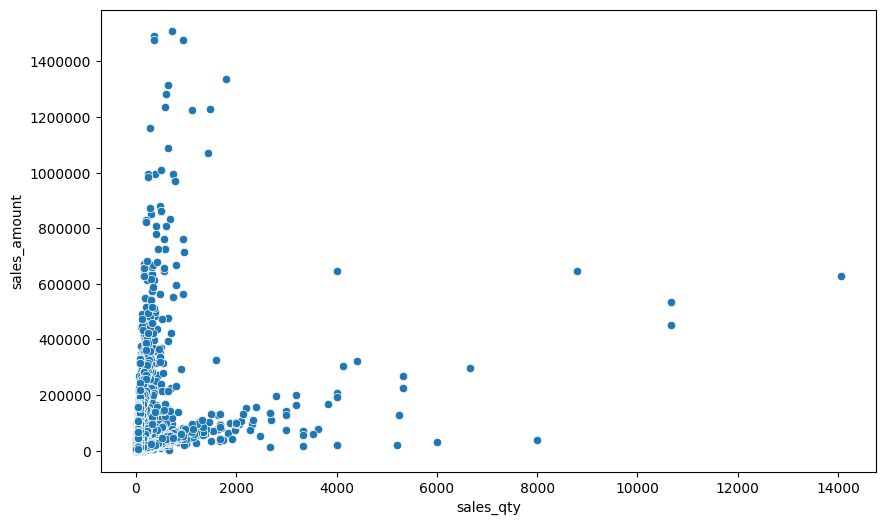

In [ ]:
#Checking sales qty by sales amount
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='sales_qty',y='sales_amount')
plt.ticklabel_format(style='plain', axis='both', useOffset=False)
plt.show()

<Axes: xlabel='sales_qty', ylabel='sales_amount'>

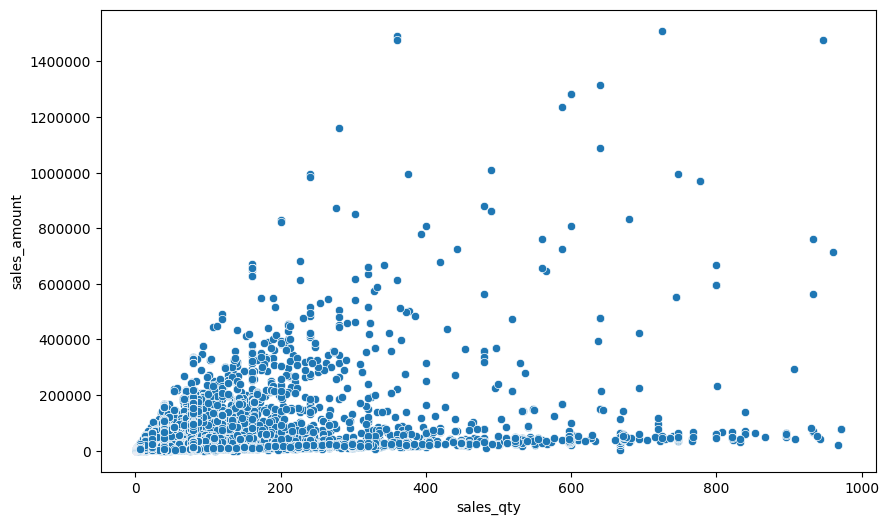

In [ ]:
plt.figure(figsize=(10,6))

temp = df[df['sales_qty'] <1000].copy()
plt.ticklabel_format(style='plain', axis='both', useOffset=False)
sns.scatterplot(data=temp, x='sales_qty',y='sales_amount')
# IS 1: There are a lot of points grouped on the left bottom corner
#This indicates we sell a reduced number of items at reduced sales amount
# I have to check this over the years

In [ ]:
# IS 2: By a reduced qty, we generate a big sales amount
#Maybe we could focuss on these products?
sales_amount_mean = df['sales_amount'].mean()
is2 = df[(df['sales_amount']>2*sales_amount_mean) & (df['sales_qty']<1000) ]
is2['product_code'].value_counts().head(7)

,count
product_code,
Prod318,1239
Prod334,579
Prod316,510
Prod324,395
Prod018,337
Prod159,311
Prod060,311


In [ ]:
#Checking sales_amount
df['sales_amount'].min(), df['sales_amount'].max()

(5, 1510944)

<Axes: >

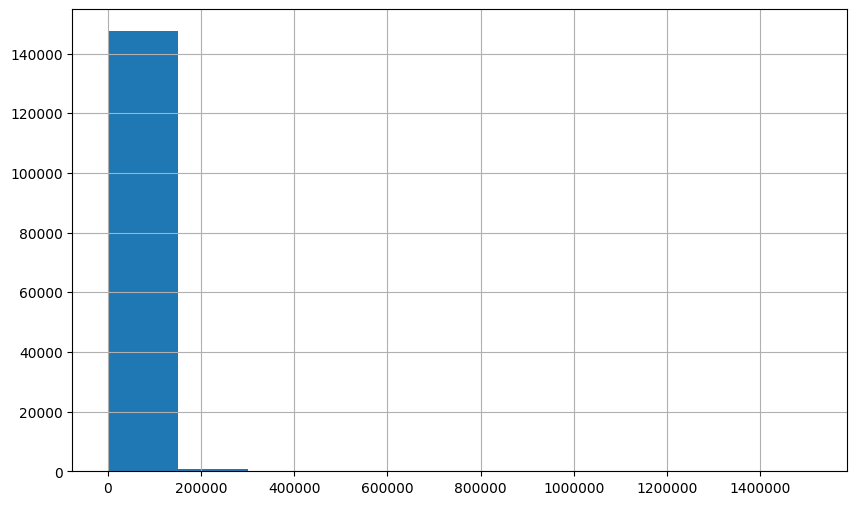

In [ ]:
plt.figure(figsize=(10,6))
plt.ticklabel_format(style='plain', axis='both', useOffset=False)

df['sales_amount'].hist()

<Axes: >

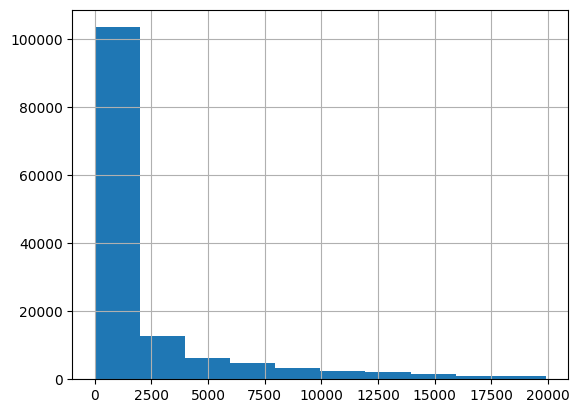

In [ ]:
temp = df[df['sales_amount']< 3*sales_amount_mean].copy()
temp['sales_amount'].hist()

<Axes: >

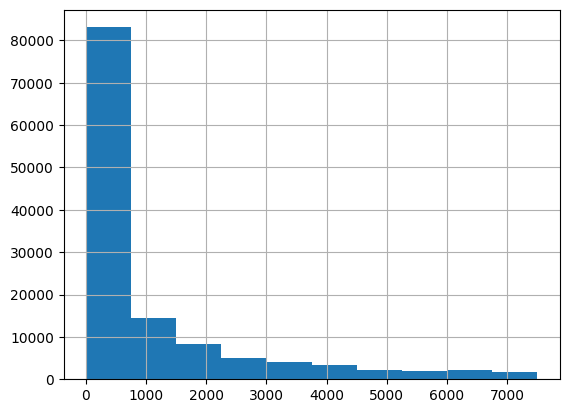

In [ ]:
temp = df[df['sales_amount']< 7500].copy()
temp['sales_amount'].hist()
# IS 2: This confirm that we have tons of sales at low sales_amount

In [ ]:
cost_price_mean =  df['cost_price'].mean()
df['cost_price'].min(), df['cost_price'].max(), cost_price_mean


(3.05, 1846742.5, np.float64(6470.648570302234))

<Axes: >

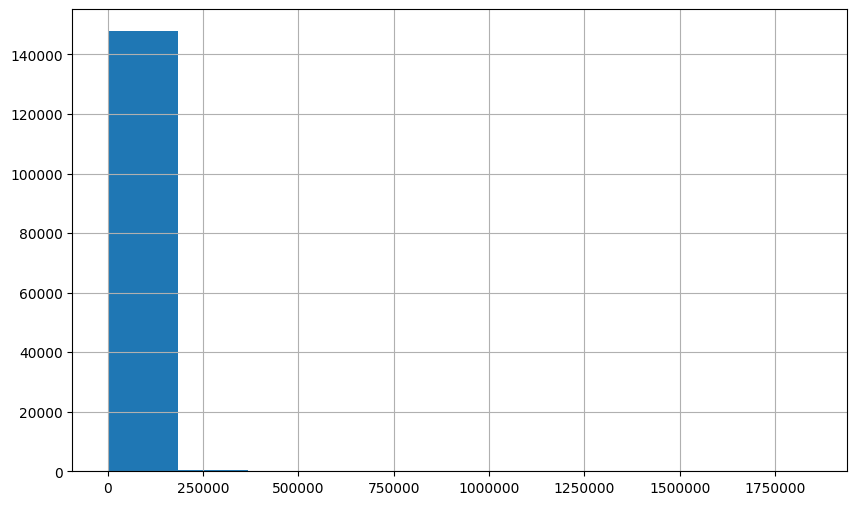

In [ ]:
plt.figure(figsize=(10,6))
plt.ticklabel_format(style='plain', axis='both', useOffset=False)
df['cost_price'].hist()

<Axes: >

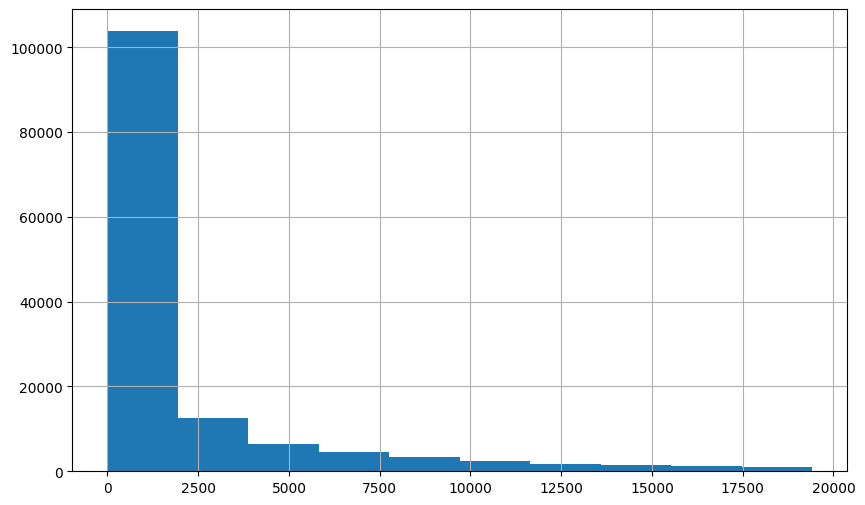

In [ ]:
temp = df[df['cost_price'] < 3*cost_price_mean]
plt.figure(figsize=(10,6))
plt.ticklabel_format(style='plain', axis='both', useOffset=False)
temp['cost_price'].hist()
# IS 4: This shows that most of our products are low cost price
# I could expect that most of our sales amount came from low cost price products

<Axes: xlabel='cost_price', ylabel='sales_amount'>

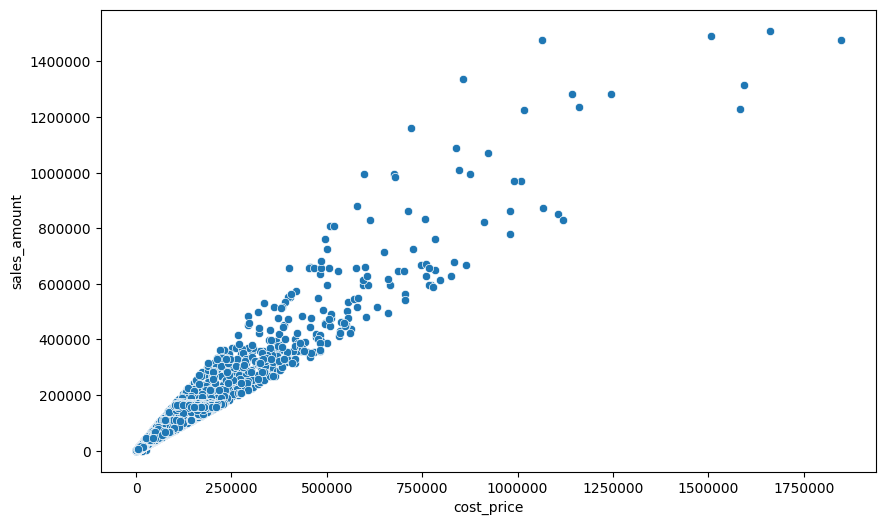

In [ ]:
plt.figure(figsize=(10,6))

plt.ticklabel_format(style='plain', axis='both', useOffset=False)
sns.scatterplot(data=df, x='cost_price',y='sales_amount')


<Axes: xlabel='cost_price', ylabel='sales_amount'>

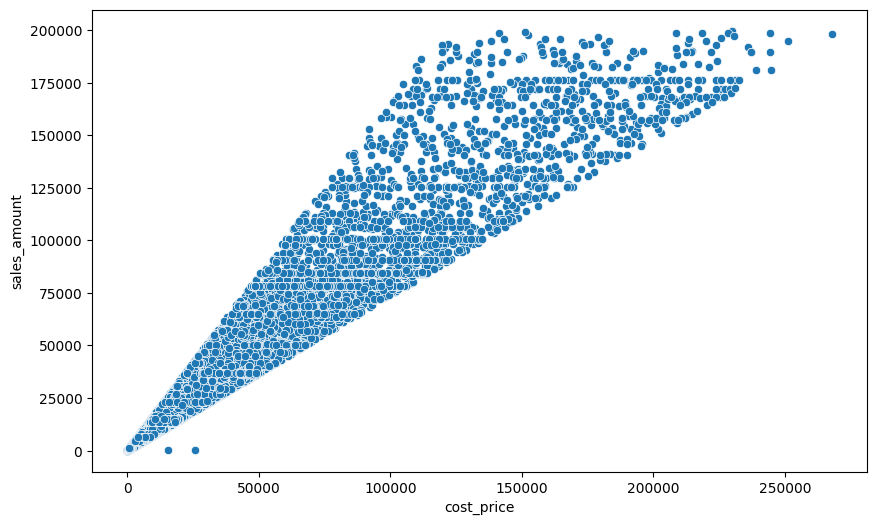

In [ ]:
#Most of our sales are on this area
plt.figure(figsize=(10,6))
temp = df[(df['cost_price']<500000)& (df['sales_amount']<200000)]
plt.ticklabel_format(style='plain', axis='both', useOffset=False)
sns.scatterplot(data=temp, x='cost_price',y='sales_amount')
# IS 5: I have two types of data to compare with profit
# Where we have most of our data and
# Where we have 'outliers'

In [ ]:
'''Checking profit margin '''
df['profit_margin'].min(),df['profit_margin'].max(),df['profit_margin'].mean()

(-369348.5, 481775.04, np.float64(166.15835041611913))

In [ ]:
df[df['profit_margin'] <0]
''' Sales team explanation: We cant sell higer
but we cant keep them '''

' Sales team explanation: We cant sell higer\nbut we cant keep them '

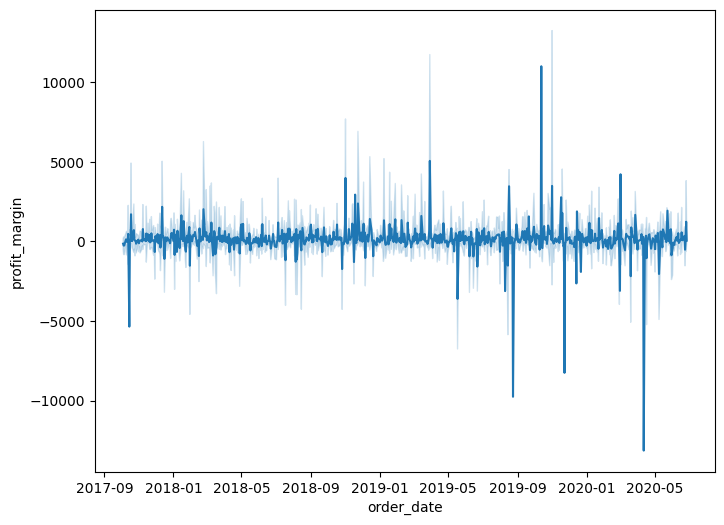

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x='order_date',y='profit_margin')
plt.show()

In [ ]:
monthly_mean  = df.resample('m', on='order_date')['profit_margin'].median().reset_index()
monthly_mean.head()

<ipython-input-50-a0e93a0c8a90>:1: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean  = df.resample('m', on='order_date')['profit_margin'].median().reset_index()


,order_date,profit_margin
0,2017-10-31,4.51
1,2017-11-30,5.85
2,2017-12-31,6.86
3,2018-01-31,5.24
4,2018-02-28,4.15


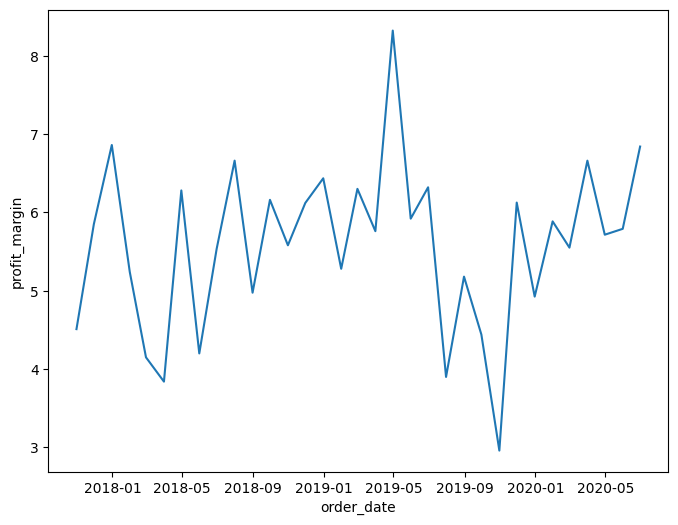

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(data=monthly_mean, x='order_date',y='profit_margin')
plt.show()

<ipython-input-52-7af13333a223>:1: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean1  = df.resample('m', on='order_date')['profit_margin_percentage'].median().reset_index()


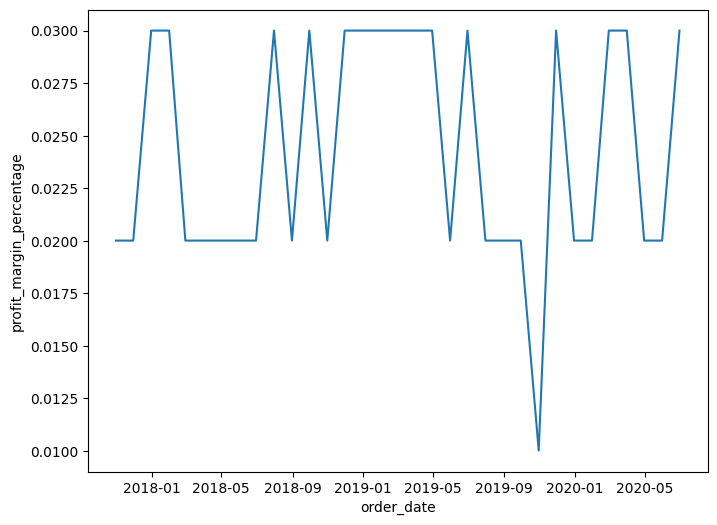

In [ ]:
monthly_mean1  = df.resample('m', on='order_date')['profit_margin_percentage'].median().reset_index()
plt.figure(figsize=(8,6))
sns.lineplot(data=monthly_mean1, x='order_date',y='profit_margin_percentage')
plt.show()

In [ ]:
df['sales_amount'].min(),df['sales_amount'].max(),df['sales_amount'].mean()

(5, 1510944, np.float64(6636.432918898885))

<Axes: >

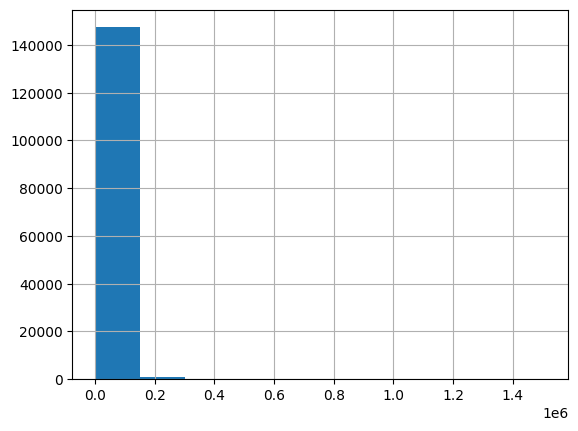

In [ ]:
df['sales_amount'].hist()

<ipython-input-55-3372ec95d308>:1: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean1  = df.resample('m', on='order_date')['sales_amount'].median().reset_index()


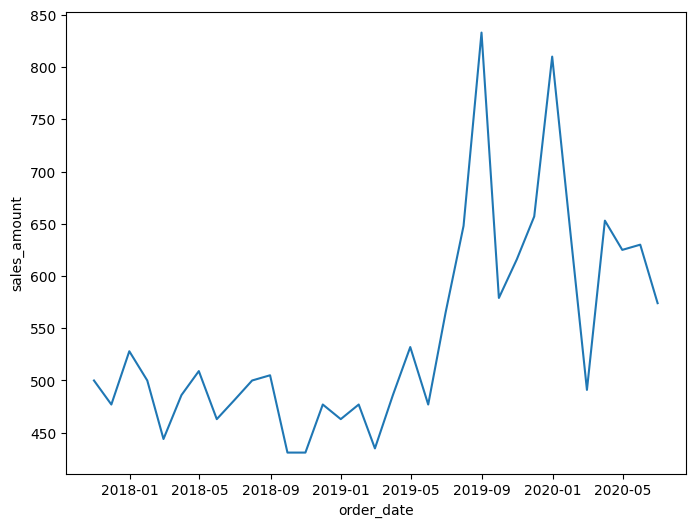

In [ ]:
monthly_mean1  = df.resample('m', on='order_date')['sales_amount'].median().reset_index()
plt.figure(figsize=(8,6))
sns.lineplot(data=monthly_mean1, x='order_date',y='sales_amount')
plt.show()

In [ ]:
''' From half year of 2019 '''

' From half year of 2019 '

In [ ]:
df['order_date']

,order_date
0,2017-10-11
1,2017-10-18
2,2017-10-19
3,2017-11-08
4,2018-03-09
...,...
148390,2020-06-11
148391,2020-06-12
148392,2020-06-17
148393,2020-06-17


# Insights

In [ ]:
year_mean  = df.resample('Y', on='order_date')['sales_amount'].sum().reset_index()
'''Problem statement, our earnings for 2019 got lower than for 2018  '''
year_mean

<ipython-input-58-7f9c7a342363>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  year_mean  = df.resample('Y', on='order_date')['sales_amount'].sum().reset_index()


,order_date,sales_amount
0,2017-12-31,92882653
1,2018-12-31,413687163
2,2019-12-31,336019102
3,2020-12-31,142224545


In [ ]:
year_mean  = df.resample('Y', on='order_date')['profit_margin'].sum().reset_index()
'''Problem statement, our earnings for 2019 got lower than for 2018  '''
year_mean

<ipython-input-59-88b4037fe44d>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  year_mean  = df.resample('Y', on='order_date')['profit_margin'].sum().reset_index()


,order_date,profit_margin
0,2017-12-31,2773068.03
1,2018-12-31,9337296.15
2,2019-12-31,10486543.89
3,2020-12-31,2060160.34


In [ ]:
df['order_date'].duplicated().sum()

np.int64(147591)

In [ ]:
df['order_date'].value_counts()[df['order_date'].value_counts() > 1]


,count
order_date,
2018-06-22,375
2018-07-20,343
2018-12-21,342
2018-06-11,329
2017-11-03,328
...,...
2018-09-09,2
2019-05-11,2
2019-08-17,2


In [ ]:
df[df['order_date'] == '2018-06-22']

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,profit_margin_percentage,profit_margin,cost_price,customer_name,customer_type,product_type,markets_code,markets_name,zone
976,Prod269,Cus020,Mark011,2018-06-22,1,106,INR,0.01,1.06,104.94,Nixon,E-Commerce,Own Brand,Mark011,Nagpur,Central
2017,Prod265,Cus020,Mark011,2018-06-22,1,116,INR,0.19,22.04,93.96,Nixon,E-Commerce,Distribution,Mark011,Nagpur,Central
2138,Prod267,Cus020,Mark011,2018-06-22,1,116,INR,-0.03,-3.48,119.48,Nixon,E-Commerce,Distribution,Mark011,Nagpur,Central
2655,Prod295,Cus020,Mark011,2018-06-22,1,97,INR,-0.25,-24.25,121.25,Nixon,E-Commerce,NaN,Mark011,Nagpur,Central
2933,Prod300,Cus020,Mark011,2018-06-22,1,139,INR,0.17,23.63,115.37,Nixon,E-Commerce,NaN,Mark011,Nagpur,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145525,Prod210,Cus006,Mark004,2018-06-22,77,78394,INR,-0.12,-9407.28,87801.28,Electricalsara Stores,Brick & Mortar,Own Brand,Mark004,Delhi NCR,North
145526,Prod215,Cus006,Mark004,2018-06-22,77,100481,INR,0.21,21101.01,79379.99,Electricalsara Stores,Brick & Mortar,Own Brand,Mark004,Delhi NCR,North
145894,Prod239,Cus006,Mark004,2018-06-22,1049,68597,INR,-0.03,-2057.91,70654.91,Electricalsara Stores,Brick & Mortar,Own Brand,Mark004,Delhi NCR,North
148020,Prod329,Cus006,Mark004,2018-06-22,40,167991,INR,-0.27,-45357.57,213348.57,Electricalsara Stores,Brick & Mortar,NaN,Mark004,Delhi NCR,North


In [ ]:
df['order_date'].max()
''' No se puede poner fecha como indice'''

' No se puede poner fecha como indice'

In [ ]:

df['order_date']

,order_date
0,2017-10-11
1,2017-10-18
2,2017-10-19
3,2017-11-08
4,2018-03-09
...,...
148390,2020-06-11
148391,2020-06-12
148392,2020-06-17
148393,2020-06-17


In [ ]:
print(df['order_date'].dtype)


datetime64[ns]


In [ ]:
print(df['order_date'].min())

2017-10-04 00:00:00


In [ ]:

# Filtrar los primeros 3 meses del año 2017
t2018 = df[
    (df['order_date'] >= '2018-01-01') &
    (df['order_date'] < '2018-04-01')
]
t2018['profit_margin'].sum()

np.float64(3132925.03)

In [ ]:

# Filtrar los primeros 3 meses del año 2017
t2018 = df[
    (df['order_date'] >= '2019-01-01') &
    (df['order_date'] < '2019-04-01')
]
t2018['profit_margin'].sum()

np.float64(3679458.6999999997)

In [ ]:

# Filtrar los primeros 3 meses del año 2017
t2018 = df[
    (df['order_date'] >= '2020-01-01') &
    (df['order_date'] < '2020-04-01')
]
''' Problem statement'''
t2018['profit_margin'].sum()


np.float64(1454230.7699999998)

In [ ]:
df.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,profit_margin_percentage,profit_margin,cost_price,customer_name,customer_type,product_type,markets_code,markets_name,zone
0,Prod279,Cus020,Mark011,2017-10-11,1,102,INR,0.39,39.78,62.22,Nixon,E-Commerce,Distribution,Mark011,Nagpur,Central
1,Prod279,Cus020,Mark011,2017-10-18,1,102,INR,-0.12,-12.24,114.24,Nixon,E-Commerce,Distribution,Mark011,Nagpur,Central
2,Prod279,Cus020,Mark011,2017-10-19,1,102,INR,0.29,29.58,72.42,Nixon,E-Commerce,Distribution,Mark011,Nagpur,Central
3,Prod279,Cus020,Mark011,2017-11-08,1,102,INR,0.36,36.72,65.28,Nixon,E-Commerce,Distribution,Mark011,Nagpur,Central
4,Prod279,Cus020,Mark011,2018-03-09,1,102,INR,-0.35,-35.70,137.70,Nixon,E-Commerce,Distribution,Mark011,Nagpur,Central


<ipython-input-71-b3641a37ab7c>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.resample('M', on='order_date')['sales_amount'].sum().reset_index()


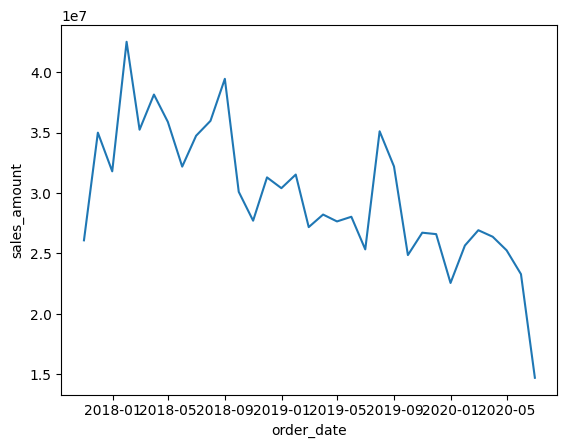

' Another problem statement '

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Resample para sumar las ventas por día (puedes cambiar 'D' por 'M' para por mes, por ejemplo)
df_resampled = df.resample('M', on='order_date')['sales_amount'].sum().reset_index()

# Graficar
sns.lineplot(data=df_resampled, x='order_date', y='sales_amount')
plt.show()
''' Another problem statement '''

In [ ]:
df

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,profit_margin_percentage,profit_margin,cost_price,customer_name,customer_type,product_type,markets_code,markets_name,zone
0,Prod279,Cus020,Mark011,2017-10-11,1,102,INR,0.39,39.78,62.22,Nixon,E-Commerce,Distribution,Mark011,Nagpur,Central
1,Prod279,Cus020,Mark011,2017-10-18,1,102,INR,-0.12,-12.24,114.24,Nixon,E-Commerce,Distribution,Mark011,Nagpur,Central
2,Prod279,Cus020,Mark011,2017-10-19,1,102,INR,0.29,29.58,72.42,Nixon,E-Commerce,Distribution,Mark011,Nagpur,Central
3,Prod279,Cus020,Mark011,2017-11-08,1,102,INR,0.36,36.72,65.28,Nixon,E-Commerce,Distribution,Mark011,Nagpur,Central
4,Prod279,Cus020,Mark011,2018-03-09,1,102,INR,-0.35,-35.70,137.70,Nixon,E-Commerce,Distribution,Mark011,Nagpur,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148390,Prod124,Cus006,Mark004,2020-06-11,40,14815,INR,0.07,1037.05,13777.95,Electricalsara Stores,Brick & Mortar,Own Brand,Mark004,Delhi NCR,North
148391,Prod252,Cus006,Mark004,2020-06-12,40,6676,INR,0.00,0.00,6676.00,Electricalsara Stores,Brick & Mortar,Distribution,Mark004,Delhi NCR,North
148392,Prod117,Cus006,Mark004,2020-06-17,40,13384,INR,-0.35,-4684.40,18068.40,Electricalsara Stores,Brick & Mortar,Distribution,Mark004,Delhi NCR,North
148393,Prod329,Cus006,Mark004,2020-06-17,40,157435,INR,0.04,6297.40,151137.60,Electricalsara Stores,Brick & Mortar,NaN,Mark004,Delhi NCR,North


<ipython-input-73-ac80e4301d22>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.resample('M', on='order_date')['profit_margin'].sum().reset_index()


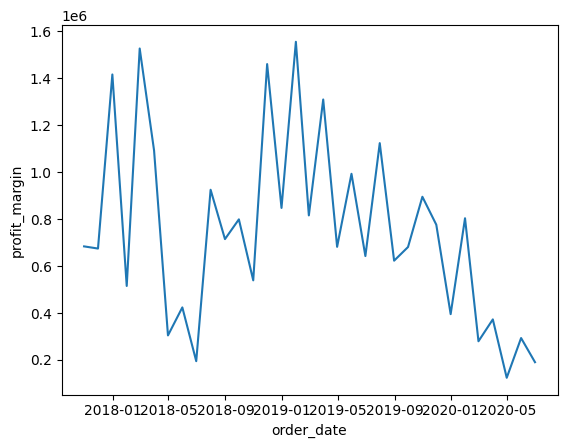

' Another problem statement '

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Resample para sumar las ventas por día (puedes cambiar 'D' por 'M' para por mes, por ejemplo)
df_resampled = df.resample('M', on='order_date')['profit_margin'].sum().reset_index()

# Graficar
sns.lineplot(data=df_resampled, x='order_date', y='profit_margin')
plt.show()
''' Another problem statement '''

In [ ]:
''' Checar si en power Bi esto generar nan'''
df.groupby('customer_code')['sales_amount'].sum().sort_values(ascending=False)


,sales_amount
customer_code,
Cus006,413333588
Cus022,49644189
Cus003,49115620
Cus005,44906666
Cus020,43893083
Cus007,35100033
Cus027,31771997
Cus001,28648916
Cus008,21196727


In [ ]:
df.groupby('markets_name')['profit_margin_percentage'].sum().sort_values(ascending=False)

,profit_margin_percentage
markets_name,
Nagpur,1204.34
Delhi NCR,1035.51
Ahmedabad,495.70
Bhopal,335.51
Mumbai,270.05
Kochi,122.99
Kanpur,67.66
Hyderabad,50.82
Chennai,22.85


In [ ]:
'''Contribuciòn a sales amount'''
df['x'] = df['sales_amount'] / df['profit_margin'].sum()
df.groupby('markets_name')['x'].median().sort_values(ascending=False)

NameError: name 'df' is not defined

In [ ]:
'''Contribuciòn a sales amount'''
df['sales_amount_contribution'] = df['sales_amount'] / df['sales_amount'].sum()
df.groupby('markets_name')['sales_amount_contribution'].sum().sort_values(ascending=False)

,sales_amount_contribution
markets_name,
Delhi NCR,0.527526
Mumbai,0.152399
Ahmedabad,0.134348
Bhopal,0.059514
Nagpur,0.055875
Kochi,0.019104
Chennai,0.018321
Kanpur,0.013792
Hyderabad,0.007552


In [ ]:
df.groupby('markets_name')['sales_amount'].sum().sort_values(ascending=False)

,sales_amount
markets_name,
Delhi NCR,519514271
Mumbai,150084801
Ahmedabad,132307441
Bhopal,58609861
Nagpur,55026321
Kochi,18813466
Chennai,18042702
Kanpur,13582609
Hyderabad,7436823


In [ ]:
'''Contribuciòn al profit '''
df['profit_contribution'] = df['profit_margin'] / df['profit_margin'].sum()
df['profit_contribution']

,profit_contribution
0,1.613330e-06
1,-4.964094e-07
2,1.199656e-06
3,1.489228e-06
4,-1.447861e-06
...,...
148390,4.205893e-05
148391,0.000000e+00
148392,-1.899820e-04
148393,2.553994e-04


In [ ]:
''' Checar si en power Bi esto generar nan'''
df.groupby('markets_name')['profit_contribution'].sum().sort_values(ascending=False)


,profit_contribution
markets_name,
Delhi NCR,0.484802
Mumbai,0.197616
Ahmedabad,0.115515
Bhopal,0.092758
Nagpur,0.057270
Kochi,0.028523
Chennai,0.012190
Patna,0.007392
Surat,0.005138


In [ ]:
df.columns

Index(['product_code', 'customer_code', 'market_code', 'order_date',
       'sales_qty', 'sales_amount', 'currency', 'profit_margin_percentage',
       'profit_margin', 'cost_price', 'customer_name', 'customer_type',
       'product_type', 'markets_code', 'markets_name', 'zone', 'x',
       'sales_amount_contribution', 'profit_contribution'],
      dtype='object')

In [ ]:
g = df.groupby('markets_name')['profit_margin_percentage'].mean() * 100
g.sort_values(ascending=False)

,profit_margin_percentage
markets_name,
Surat,2.709677
Nagpur,2.526411
Bhopal,2.518466
Kochi,2.499797
Hyderabad,2.498525
Ahmedabad,2.474170
Kanpur,2.406973
Mumbai,2.385390
Patna,2.343284


In [ ]:
stats = df[['sales_qty','sales_amount','profit_margin']].sum()/1000000
stats.round()

,0
sales_qty,2.0
sales_amount,985.0
profit_margin,25.0


In [ ]:
df[['profit_margin_percentage']].sum()

,0
profit_margin_percentage,3627.91


In [ ]:
df.columns

Index(['product_code', 'customer_code', 'market_code', 'order_date',
       'sales_qty', 'sales_amount', 'currency', 'profit_margin_percentage',
       'profit_margin', 'cost_price', 'customer_name', 'customer_type',
       'product_type', 'markets_code', 'markets_name', 'zone', 'x',
       'sales_amount_contribution', 'profit_contribution'],
      dtype='object')

In [ ]:
df['profit_margin_contribution'] = (df['profit_margin'] / df['profit_margin'].sum()) * 100

In [ ]:
df[['profit_margin_contribution','profit_margin_percentage']].sum()

,0
profit_margin_contribution,100.00
profit_margin_percentage,3627.91


In [ ]:
kinda = df.groupby('markets_name')['profit_margin_contribution'].sum()
kinda.sort_values(ascending=False)

,profit_margin_contribution
markets_name,
Delhi NCR,48.480210
Mumbai,19.761635
Ahmedabad,11.551529
Bhopal,9.275838
Nagpur,5.726998
Kochi,2.852286
Chennai,1.219014
Patna,0.739183
Surat,0.513756


In [ ]:
df[['profit_margin_contribution','profit_margin_percentage']].sum()

,0
profit_margin_contribution,100.00
profit_margin_percentage,3627.91


In [ ]:
df.columns

Index(['product_code', 'customer_code', 'market_code', 'order_date',
       'sales_qty', 'sales_amount', 'currency', 'profit_margin_percentage',
       'profit_margin', 'cost_price', 'customer_name', 'customer_type',
       'product_type', 'markets_code', 'markets_name', 'zone', 'x',
       'sales_amount_contribution', 'profit_contribution',
       'profit_margin_contribution'],
      dtype='object')

In [ ]:
df['revenue_contribution'] = (df['sales_amount'] / df['sales_amount'].sum()) * 100

In [ ]:
df[['revenue_contribution','sales_amount']].sum()

,0
revenue_contribution,100.0
sales_amount,984813463.0


In [ ]:
kinda = df.groupby('markets_name')['revenue_contribution'].sum()
kinda.sort_values(ascending=False)

,revenue_contribution
markets_name,
Delhi NCR,52.752556
Mumbai,15.239922
Ahmedabad,13.434772
Bhopal,5.951367
Nagpur,5.587487
Kochi,1.910358
Chennai,1.832093
Kanpur,1.379206
Hyderabad,0.755150


In [ ]:
df.columns

Index(['product_code', 'customer_code', 'market_code', 'order_date',
       'sales_qty', 'sales_amount', 'currency', 'profit_margin_percentage',
       'profit_margin', 'cost_price', 'customer_name', 'customer_type',
       'product_type', 'markets_code', 'markets_name', 'zone', 'x',
       'sales_amount_contribution', 'profit_contribution',
       'profit_margin_contribution', 'revenue_contribution'],
      dtype='object')

In [ ]:
kinda = df.groupby('markets_name')['profit_margin_percentage'].sum()
kinda.sort_values(ascending=False)

,profit_margin_percentage
markets_name,
Nagpur,1204.34
Delhi NCR,1035.51
Ahmedabad,495.70
Bhopal,335.51
Mumbai,270.05
Kochi,122.99
Kanpur,67.66
Hyderabad,50.82
Chennai,22.85


In [ ]:
kinda = df.groupby('markets_name')['profit_margin'].mean()
kinda.sort_values(ascending=False)

,profit_margin
markets_name,
Patna,453.385025
Mumbai,430.407188
Bhubaneshwar,317.824643
Surat,314.335112
Lucknow,299.627019
Chennai,292.386187
Delhi NCR,270.331724
Bhopal,171.682157
Kochi,142.945120


In [ ]:
kinda = df.groupby('markets_name')['profit_margin_percentage'].mean()
kinda.sort_values(ascending=False)

,profit_margin_percentage
markets_name,
Surat,0.027097
Nagpur,0.025264
Bhopal,0.025185
Kochi,0.024998
Hyderabad,0.024985
Ahmedabad,0.024742
Kanpur,0.024070
Mumbai,0.023854
Patna,0.023433


# Performance tracker

La relación entre el margen de beneficio total y los ingresos refleja cuán grande es el beneficio absoluto con respecto a las ventas totales. Es decir, qué parte de cada unidad de ingreso corresponde al beneficio total (sin expresar esto como porcentaje).

Si el valor resultante es bajo, puede indicar que, aunque se están generando ventas, el beneficio absoluto es relativamente bajo en comparación con los ingresos

Problema: Aunque el mercado A está generando muchos ingresos (alta contribución de ingresos), el Profit / Revenue es bajo, lo que sugiere que los márgenes de beneficio en relación con los ingresos no son tan buenos.

Recomendación: Este mercado podría beneficiarse de una revisión de costos o una estrategia para mejorar el margen de beneficio (ya sea a través de un ajuste en precios, reducción de costos o mejora de eficiencia en la operación).

Problema: El mercado C tiene un excelente Profit / Revenue (lo que indica que, en relación con sus ingresos, está generando un buen margen), pero su Profit Margin es bajo y su contribución a los ingresos es baja.

Recomendación: A pesar de que la rentabilidad relativa parece buena, la baja contribución de ingresos y el bajo Profit Margin absoluto pueden significar que este mercado tiene un potencial no aprovechado. Aumentar la Revenue Contribution podría ser clave.

Estrategia: Este mercado podría beneficiarse de un esfuerzo para aumentar la participación en el mercado o expandir la base de clientes. Además, es necesario revisar las estrategias de costos para mejorar los márgenes

In [ ]:
df.columns

Index(['product_code', 'customer_code', 'market_code', 'order_date',
       'sales_qty', 'sales_amount', 'currency', 'profit_margin_percentage',
       'profit_margin', 'cost_price', 'customer_name', 'customer_type',
       'product_type', 'markets_code', 'markets_name', 'zone', 'x',
       'sales_amount_contribution', 'profit_contribution',
       'profit_margin_contribution', 'revenue_contribution'],
      dtype='object')

In [ ]:
#Metric: Revenue last year

In [ ]:
current = df.groupby('order_date')['sales_amount'].sum()
current

,sales_amount
order_date,
2017-10-04,68643
2017-10-05,438805
2017-10-06,707603
2017-10-09,481131
2017-10-10,1445113
...,...
2020-06-22,219600
2020-06-23,57844
2020-06-24,34199


In [ ]:
ly = df.groupby('order_date')['sales_amount'].sum().shift(365)
ly

,sales_amount
order_date,
2017-10-04,NaN
2017-10-05,NaN
2017-10-06,NaN
2017-10-09,NaN
2017-10-10,NaN
...,...
2020-06-22,1157579.0
2020-06-23,2167386.0
2020-06-24,1226442.0


In [ ]:
import pandas as pd

# Asegúrate de que 'order_date' esté en formato datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Agrupar por la fecha y calcular el revenue por día
revenue_by_date = df.groupby('order_date')['sales_amount'].sum()

# Crear un DataFrame con el revenue actual y el revenue de hace un año
revenue_comparison = pd.DataFrame({
    'Revenue_Today': revenue_by_date,
    'Revenue_Last_Year': revenue_by_date.shift(periods=365, freq='D')
}).dropna().reset_index()

revenue_comparison

,order_date,Revenue_Today,Revenue_Last_Year
0,2018-10-04,1265462.0,68643.0
1,2018-10-05,1472597.0,438805.0
2,2018-10-06,25047.0,707603.0
3,2018-10-09,655904.0,481131.0
4,2018-10-10,1544932.0,1445113.0
...,...,...,...
419,2020-06-19,94385.0,1952072.0
420,2020-06-23,57844.0,875647.0
421,2020-06-24,34199.0,710601.0
422,2020-06-25,49235.0,1098192.0


In [ ]:
df_resampled = revenue_comparison.resample('M', on='order_date')[['Revenue_Today','Revenue_Last_Year']].sum().reset_index()
df_resampled

<ipython-input-103-4a881420bc6e>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = revenue_comparison.resample('M', on='order_date')[['Revenue_Today','Revenue_Last_Year']].sum().reset_index()


,order_date,Revenue_Today,Revenue_Last_Year
0,2018-10-31,21920780.0,20953098.0
1,2018-11-30,27807109.0,28798234.0
2,2018-12-31,26408409.0,25528990.0
3,2019-01-31,28561999.0,39492432.0
4,2019-02-28,22842722.0,27084698.0
5,2019-03-31,25317254.0,28433683.0
6,2019-04-30,23936136.0,29861661.0
7,2019-05-31,24592663.0,27821435.0
8,2019-06-30,21599485.0,34742765.0
9,2019-07-31,28565928.0,31369163.0


In [ ]:
revenue_comparison.dropna()

,order_date,Revenue_Today,Revenue_Last_Year
0,2018-10-04,1265462.0,68643.0
1,2018-10-05,1472597.0,438805.0
2,2018-10-06,25047.0,707603.0
3,2018-10-09,655904.0,481131.0
4,2018-10-10,1544932.0,1445113.0
...,...,...,...
419,2020-06-19,94385.0,1952072.0
420,2020-06-23,57844.0,875647.0
421,2020-06-24,34199.0,710601.0
422,2020-06-25,49235.0,1098192.0


# Questions for Falcon Team
* Why customer 005 is the obly one paying USD?
* Was sales amount, profit ... where we have USD converted to INR?
* Is sales amount in INR?
* Note that facts table colum is named market_code, but on matker table this col. is called markets_code, it should be market_code
* On customers table we have custmer_name instead of customer_name



# For power BI
## Assumtions


*   I was told to analyse data only from India
*   List item


## Overview


*   We have 38 clients
*   338 products, 191 are own brand, 88 are distribution

## Demographics



*   Nagpur is the most repeated market
*   List item



